# Potrzebne pakiety: (pip install)

pandas, numpy, matplotlib, warnings, sklearn

# Źródła kodu:

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://archive.ics.uci.edu/ml/machine-learning-databases/

Zbiory danych

Łatwe:

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

Trudne:

https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/

https://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/

Zadanie dla studentów:

1. przeprowadzić podobne wizualizacje na swoich zbiorach danych,
obydwiema metodami. Jakie są wnioski odn. różnych parametrów
wizualizacji wykorzystywanych w wizualnej analizie danych metodą pca i
kernel-pca.

2. Porównać histogramy odległości i wartości hit-to-all w przestrzeni
docelowej dla oryginalnego zbioru, zbioru po pca w 2D, zbioru kernel-pca
w 2D.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

	1. Class Name: 3 (L, B, R)
	2. Left-Weight: 5 (1, 2, 3, 4, 5)
	3. Left-Distance: 5 (1, 2, 3, 4, 5)
	4. Right-Weight: 5 (1, 2, 3, 4, 5)
	5. Right-Distance: 5 (1, 2, 3, 4, 5)

In [0]:
names = ['Class name', 'Left-weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']
df = pd.read_csv('balance-scale.csv', sep=',', names=names)
print(df.shape)
df.head(10)

(625, 5)


,Class name,Left-weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
5,R,1,1,2,1
6,R,1,1,2,2
7,R,1,1,2,3
8,R,1,1,2,4
9,R,1,1,2,5


In [0]:
features = ['Left-weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']
x= df.loc[:, features].values
y = df.loc[:,['Class name']].values
x = StandardScaler().fit_transform(x)
standarized_df = pd.DataFrame(x)

c:\users\traveler\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\traveler\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Po standaryzacji:

In [0]:
standarized_df.head(10)

,0,1,2,3
0,-1.414214,-1.414214,-1.414214,-1.414214
1,-1.414214,-1.414214,-1.414214,-0.707107
2,-1.414214,-1.414214,-1.414214,0.000000
3,-1.414214,-1.414214,-1.414214,0.707107
4,-1.414214,-1.414214,-1.414214,1.414214
5,-1.414214,-1.414214,-0.707107,-1.414214
6,-1.414214,-1.414214,-0.707107,-0.707107
7,-1.414214,-1.414214,-0.707107,0.000000
8,-1.414214,-1.414214,-0.707107,0.707107
9,-1.414214,-1.414214,-0.707107,1.414214


In [0]:
def kpcaxD(dims, param, k=True):
    selectors = ['L', 'B', 'R']
    colors = ['r', 'g', 'b']
    if k:
        kpca = KernelPCA(kernel="rbf", n_components=dims)
        principalComponents = kpca.fit_transform(x)
    else:
        pca = PCA(n_components=dims)
        principalComponents = pca.fit_transform(x)
    if dims == 2:
        principalDf = pd.DataFrame(data = principalComponents
                     , columns = ['principal component 1', 'principal component 2'])
        finalDf = pd.concat([principalDf, df[[param]]], axis = 1)
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        if k:
            ax.set_title('2 component kPCA', fontsize = 20)
        else:
            ax.set_title('2 component PCA', fontsize = 20)
        for ch, color in zip(selectors,colors):
            indicesToKeep = finalDf[param] == ch
            ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                       , finalDf.loc[indicesToKeep, 'principal component 2']
                       , c = color
                       , s = 50)
        ax.legend(selectors)
        plt.show()
    elif dims == 3:
        principalDf = pd.DataFrame(data = principalComponents
                     , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
        finalDf = pd.concat([principalDf, df[[param]]], axis = 1)
        fig = plt.figure(figsize = (8,8))
        ax = plt.axes(projection='3d')
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_zlabel('Principal Component 3', fontsize = 15)
        if k:
            ax.set_title('3 component kPCA', fontsize = 20)
        else:
            ax.set_title('3 component PCA', fontsize = 20)
        
        for ch, color in zip(selectors,colors):
            indicesToKeep = finalDf[param] == ch
            ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                       , finalDf.loc[indicesToKeep, 'principal component 2']
                       , c = color
                       , s = 50)
        ax.legend(selectors)
        plt.show()
    if k:
        return kpca
    else:
        return pca

<IPython.core.display.Javascript object>


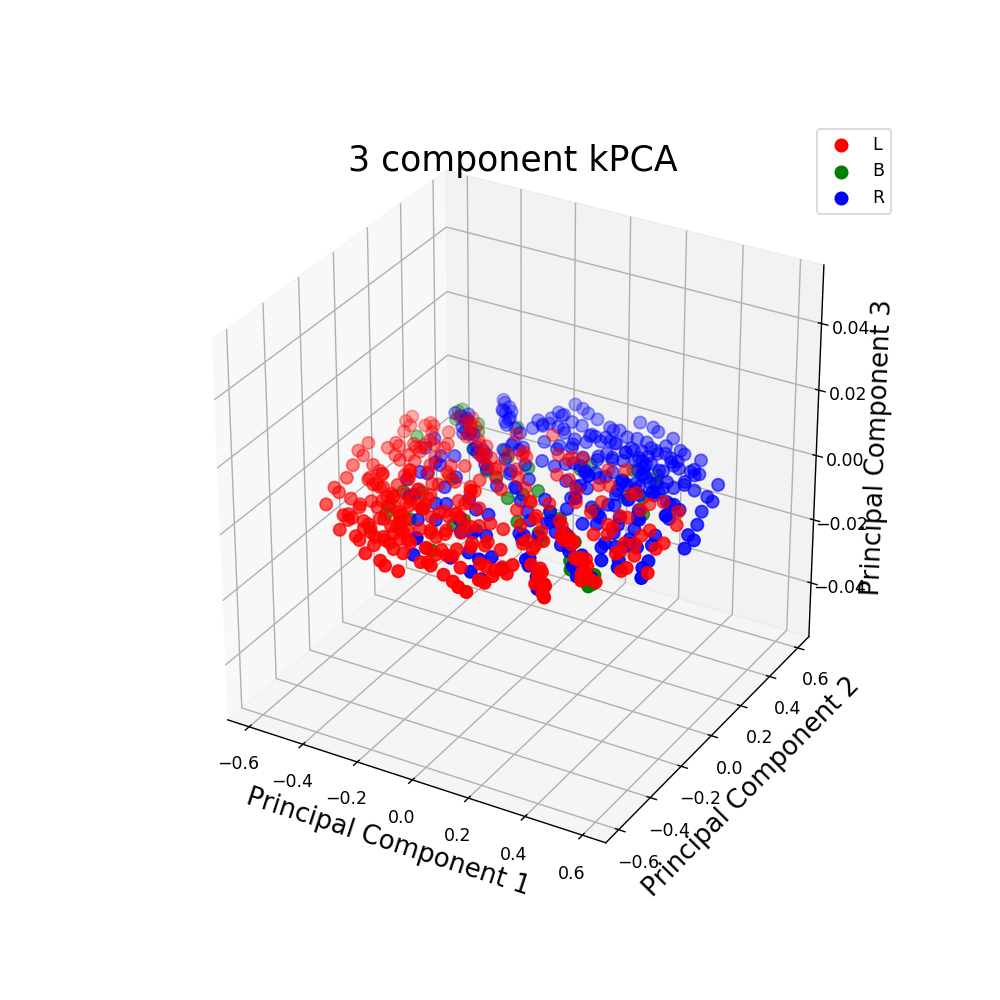

In [0]:
%matplotlib notebook
kpca = kpcaxD(dims=3, param='Class name', k=True)

<IPython.core.display.Javascript object>


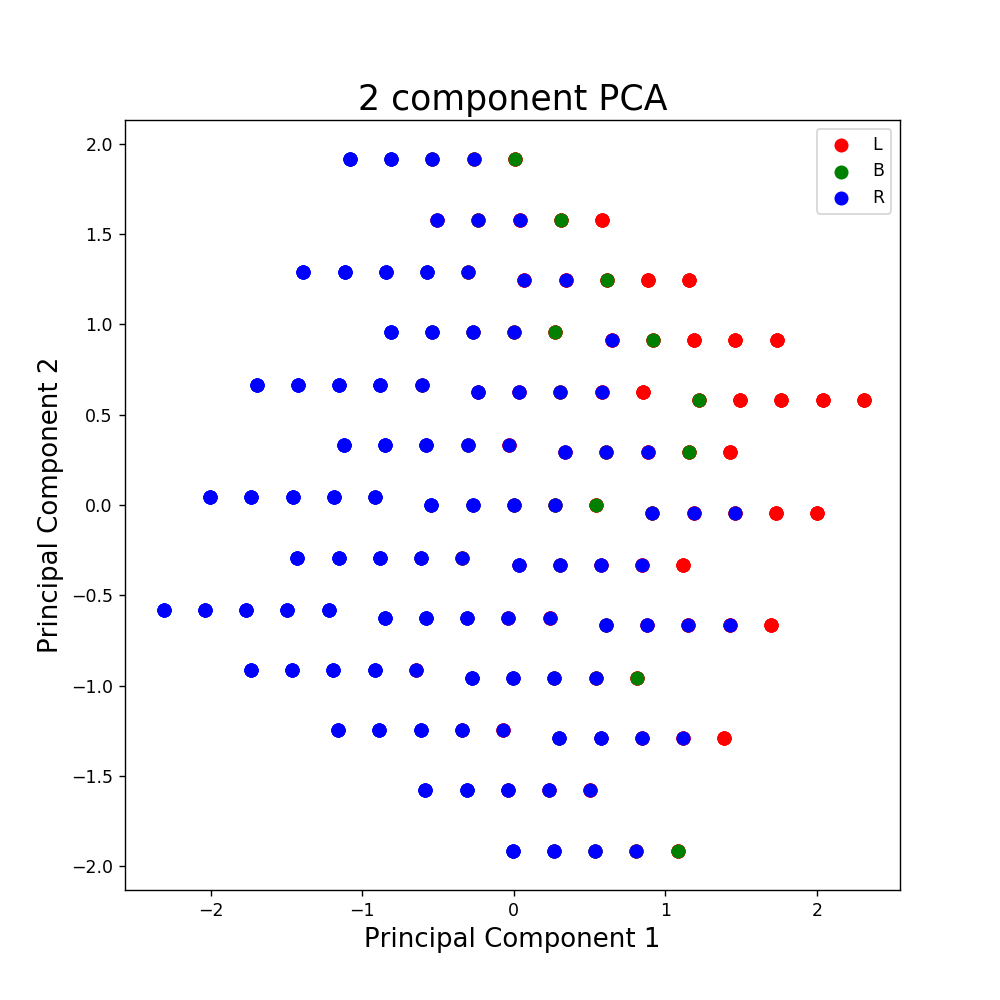

In [0]:
pca = kpcaxD(dims=2, param='Class name', k=False)

In [0]:
def show_bars(vals):
    total = sum(vals)
    heights = [x * 100 / total for x in vals]
    
    xs = np.array(range(len(heights)))
    fig = plt.figure(figsize = (4,4))
    ax = fig.add_subplot(1,1,1)
    ax.bar(xs, heights)
    plt.show()

<IPython.core.display.Javascript object>


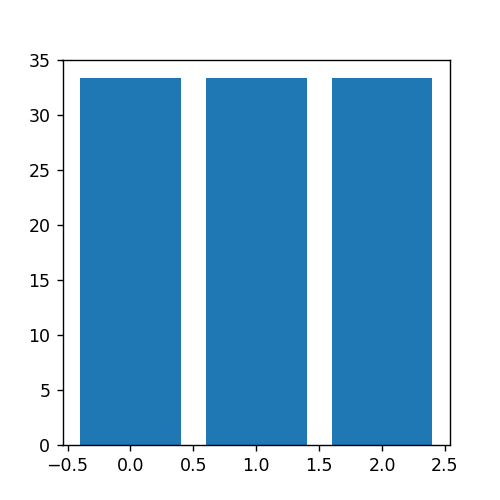

In [0]:
%matplotlib notebook
show_bars(kpca.lambdas_)

<IPython.core.display.Javascript object>


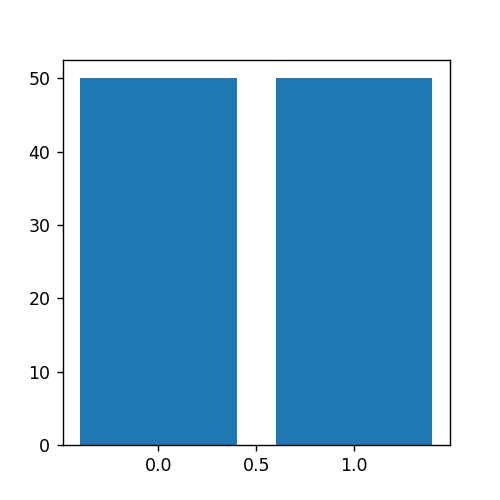

In [0]:
show_bars(pca.explained_variance_)

In [0]:
def near_nei(k, samples, labels):    
    nbrs = NearestNeighbors(k, algorithm='ball_tree').fit(samples)
    distances, indexes = nbrs.kneighbors(samples)
    res = []
    for index, neighbours in enumerate(indexes):
        close = [x for x in neighbours if labels[index] == labels[x]]
        res.append(len(list(close)) / k)
        
    return np.mean(res)

In [0]:
print("Original: " + str(near_nei(10, x, df['Class name'])))
dfkpca = pd.DataFrame(data=kpca.fit_transform(df.loc[:, df.columns != 'Class name']))
print("In kpca: " + str(near_nei(10, dfkpca, df['Class name'])))
dfpca = pd.DataFrame(data=pca.fit_transform(df.loc[:, df.columns != 'Class name']))
print("In pca: " + str(near_nei(10, dfpca, df['Class name'])))

Original: 0.79904
In kpca: 0.8193600000000001
In pca: 0.69776


In [0]:
def show_knn(rng, fit):
    knn = []
    for k in range(3, 20):
        knn.append(near_nei(k, fit, df['Class name']))
    
    return knn

def draw_scat(rng, vals):
    knn = show_knn(rng, vals)
    fig = plt.figure(figsize = (4,4))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(rng, knn)
    plt.show()

<IPython.core.display.Javascript object>


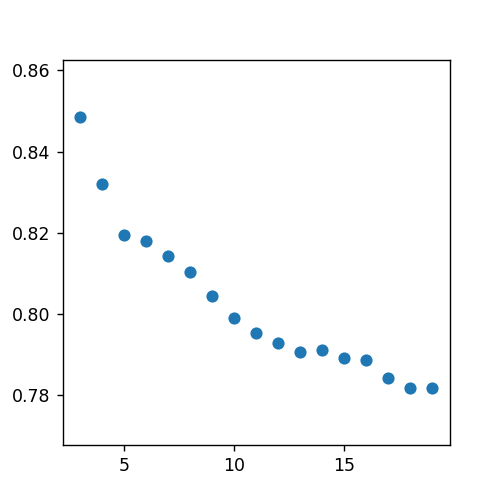

In [0]:
dfkpca = pd.DataFrame(data=kpca.fit_transform(df.loc[:, df.columns != 'Class name']))
dfpca = pd.DataFrame(data=pca.fit_transform(df.loc[:, df.columns != 'Class name']))

draw_scat(range(3,20), x)

<IPython.core.display.Javascript object>


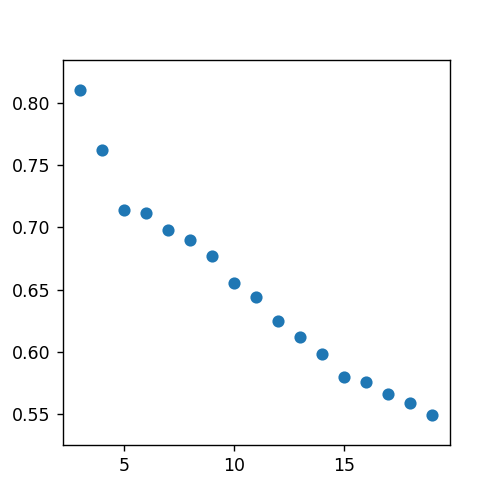

In [0]:
draw_scat(range(3,20), dfpca)

<IPython.core.display.Javascript object>


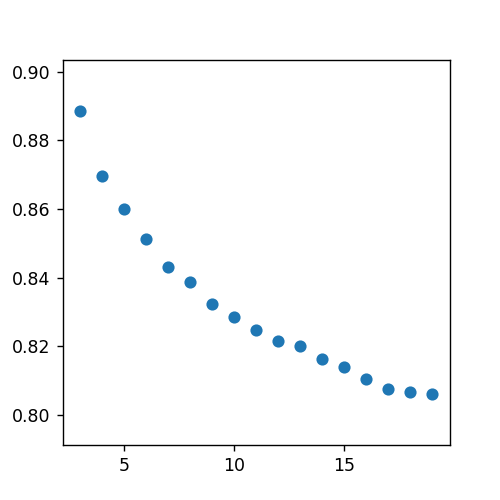

In [0]:
draw_scat(range(3,20), dfkpca)